# Two dataset simulation case study

In [1]:
from glotaran.io import load_model, load_parameters
from glotaran.simulation import simulate
import numpy as np
from pyglotaran_extras import plot_data_overview

time_axis = np.arange(-1, 20, 0.01)
spectral_axis = np.arange(600, 700, 1.4)
simulation_coordinates = {"time": time_axis, "spectral": spectral_axis}

## Simulate data

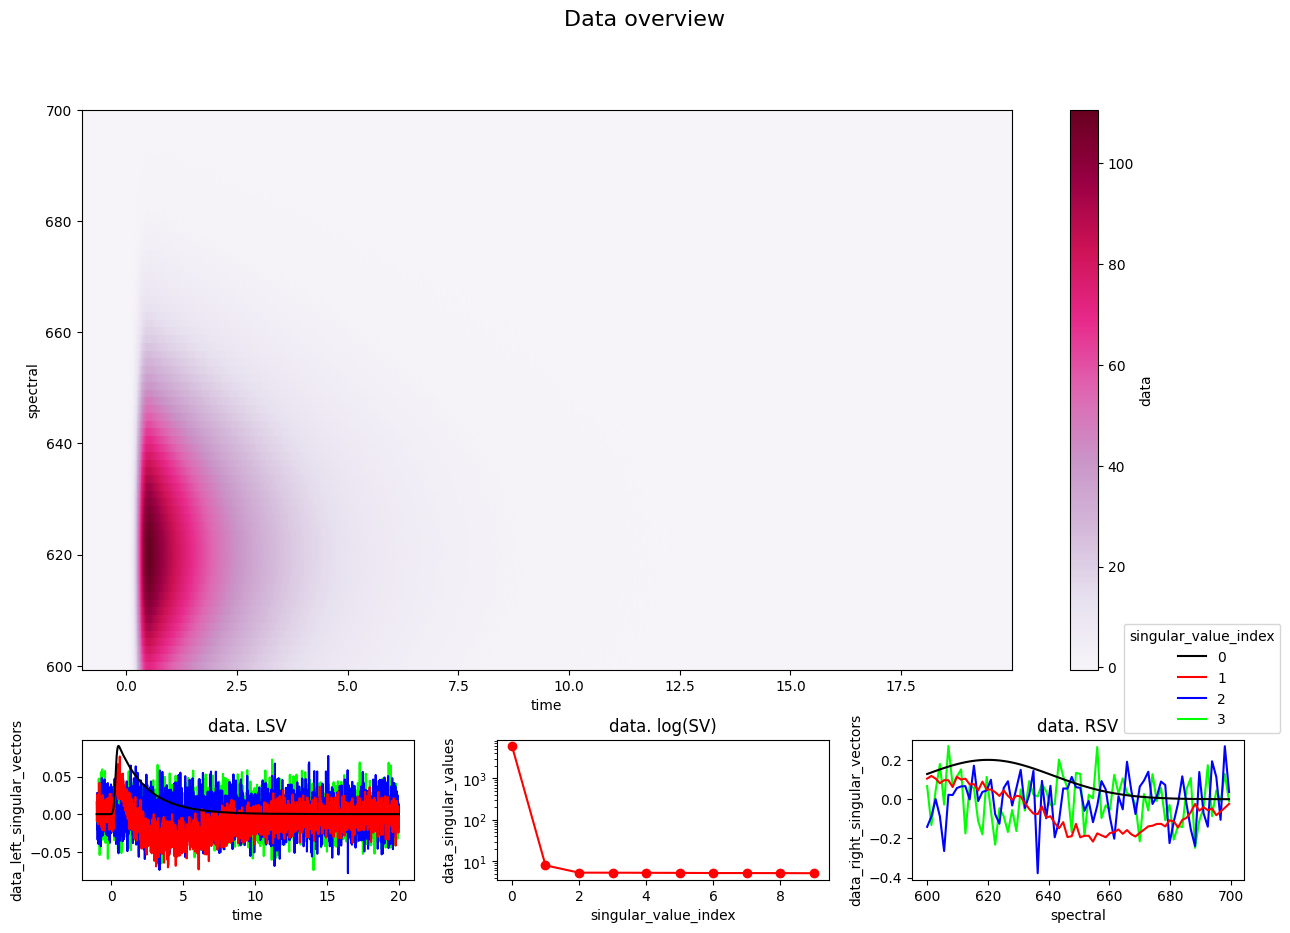

In [2]:
ds1 = simulate(
    load_model("models/sim-model-ds1.yaml"),
    "dataset_1",
    load_parameters("models/sim-params.yaml"),
    simulation_coordinates,
    noise=True,
    noise_std_dev=0.1

)
plot_data_overview(ds1);

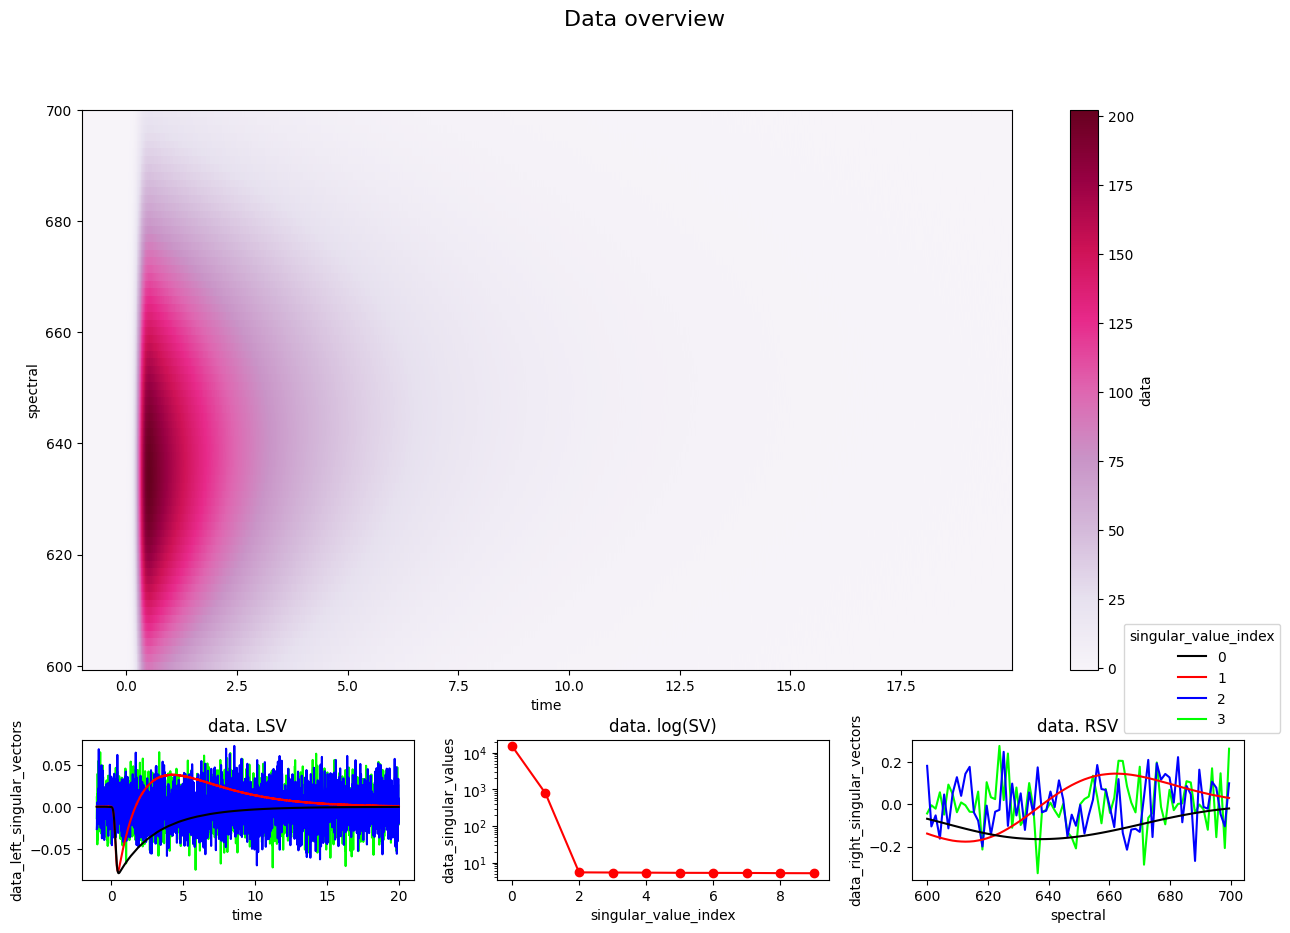

In [3]:
ds2 = simulate(
    load_model("models/sim-model-ds2.yaml"),
    "dataset_2",
    load_parameters("models/sim-params.yaml"),
    simulation_coordinates,
    noise=True,
    noise_std_dev=0.1,
)
plot_data_overview(ds2);

## Fitting with link_clp true (default)

In [4]:
from glotaran.project import Scheme

scheme = Scheme(
    model="models/fit-model_link_clp_true.yaml",
    parameters="models/fit-params.yaml",
    data={"dataset_1": ds1, "dataset_2": ds2},
)
scheme.validate()

Your model is valid.

In [5]:
from glotaran.optimization.optimize import optimize

result = optimize(scheme)
result

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3450e+07                                    2.25e+08    
       1              2         8.9949e+06      1.45e+07       1.86e+00       1.24e+08    
       2              3         1.1596e+06      7.84e+06       3.71e+00       3.15e+07    
       3              6         1.2120e+04      1.15e+06       4.64e-01       1.40e+06    
       4              7         5.0894e+03      7.03e+03       9.28e-01       6.84e+05    
       5              9         2.0961e+03      2.99e+03       4.64e-01       2.62e+05    
       6             11         1.5259e+03      5.70e+02       2.32e-01       3.22e+04    
       7             13         1.5113e+03      1.45e+01       1.16e-01       6.13e+03    
       8             15         1.5112e+03      1.05e-01       5.80e-02       7.36e+02    
       9             17         1.5112e+03      1.55e-03       2.90e-02       2.98e+02    

| Optimization Result                       |          |
|-------------------------------------------|----------|
| Number of residual evaluation             | 21       |
| Number of residuals                       | 302400   |
| Number of free parameters                 | 8        |
| Number of conditionally linear parameters | 144      |
| Degrees of freedom                        | 302248   |
| Chi Square                                | 3.02e+03 |
| Reduced Chi Square                        | 1.00e-02 |
| Root Mean Square Error (RMSE)             | 1.00e-01 |

| RMSE (per dataset)   |   weighted |   unweighted |
|----------------------|------------|--------------|
| 1.dataset_1:         |   1.00e-01 |     1.00e-01 |
| 2.dataset_2:         |   9.98e-02 |     9.98e-02 |

<br><details>

### Model

#### Dataset Groups

- **default**
  - _Label_: default
  - _Residual Function_: non_negative_least_squares


#### K Matrix

- **km2comp**
  - _Label_: km2comp
  - _Matrix_: {('species_1', 'species_1'): 'rates.species_1(5.00e-01±2.17e-05, t-value: 23063, initial: 5.50e-01)', ('species_2', 'species_2'): 'rates.species_2(3.00e-01±1.02e-05, t-value: 29552, initial: 1.00e-01)'}


#### Megacomplex

- **two_species_decay**
  - _Label_: two_species_decay
  - _Dimension_: time
  - _Type_: decay
  - _K Matrix_: ['km2comp']


#### Initial Concentration

- **input1**
  - _Label_: input1
  - _Compartments_: ['species_1', 'species_2']
  - _Parameters_: ['inputs.s1(-5.19e-01±2.21e+01, t-value: -2.3e-02, initial: 1.00e+00)', 'inputs.s2_low(-5.31e-03±1.22e-01, t-value: -4.3e-02, initial: 1.00e-01)']
  - _Exclude From Normalize_: []

- **input2**
  - _Label_: input2
  - _Compartments_: ['species_1', 'species_2']
  - _Parameters_: ['inputs.s1(-5.19e-01±2.21e+01, t-value: -2.3e-02, initial: 1.00e+00)', 'inputs.s2_normal(-1.63e+00±3.76e+01, t-value: -4.3e-02, initial: 1.00e+00)']
  - _Exclude From Normalize_: []


#### Irf

- **gaussian_irf**
  - _Label_: gaussian_irf
  - _Normalize_: True
  - _Backsweep_: False
  - _Type_: gaussian
  - _Center_: irf.center(3.00e-01±4.33e-06, t-value: 69323, initial: 3.50e-01)
  - _Width_: irf.width(1.00e-01±5.95e-06, t-value: 16813, initial: 5.00e-02)


#### Dataset

- **dataset_1**
  - _Label_: dataset_1
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['two_species_decay']
  - _Initial Concentration_: input1
  - _Irf_: gaussian_irf

- **dataset_2**
  - _Label_: dataset_2
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['two_species_decay']
  - _Scale_: scale.dataset_2(4.10e+00±1.10e+02, t-value: 3.7e-02, initial: 1.00e+00)
  - _Initial Concentration_: input2
  - _Irf_: gaussian_irf



</section></section></details><section><section>

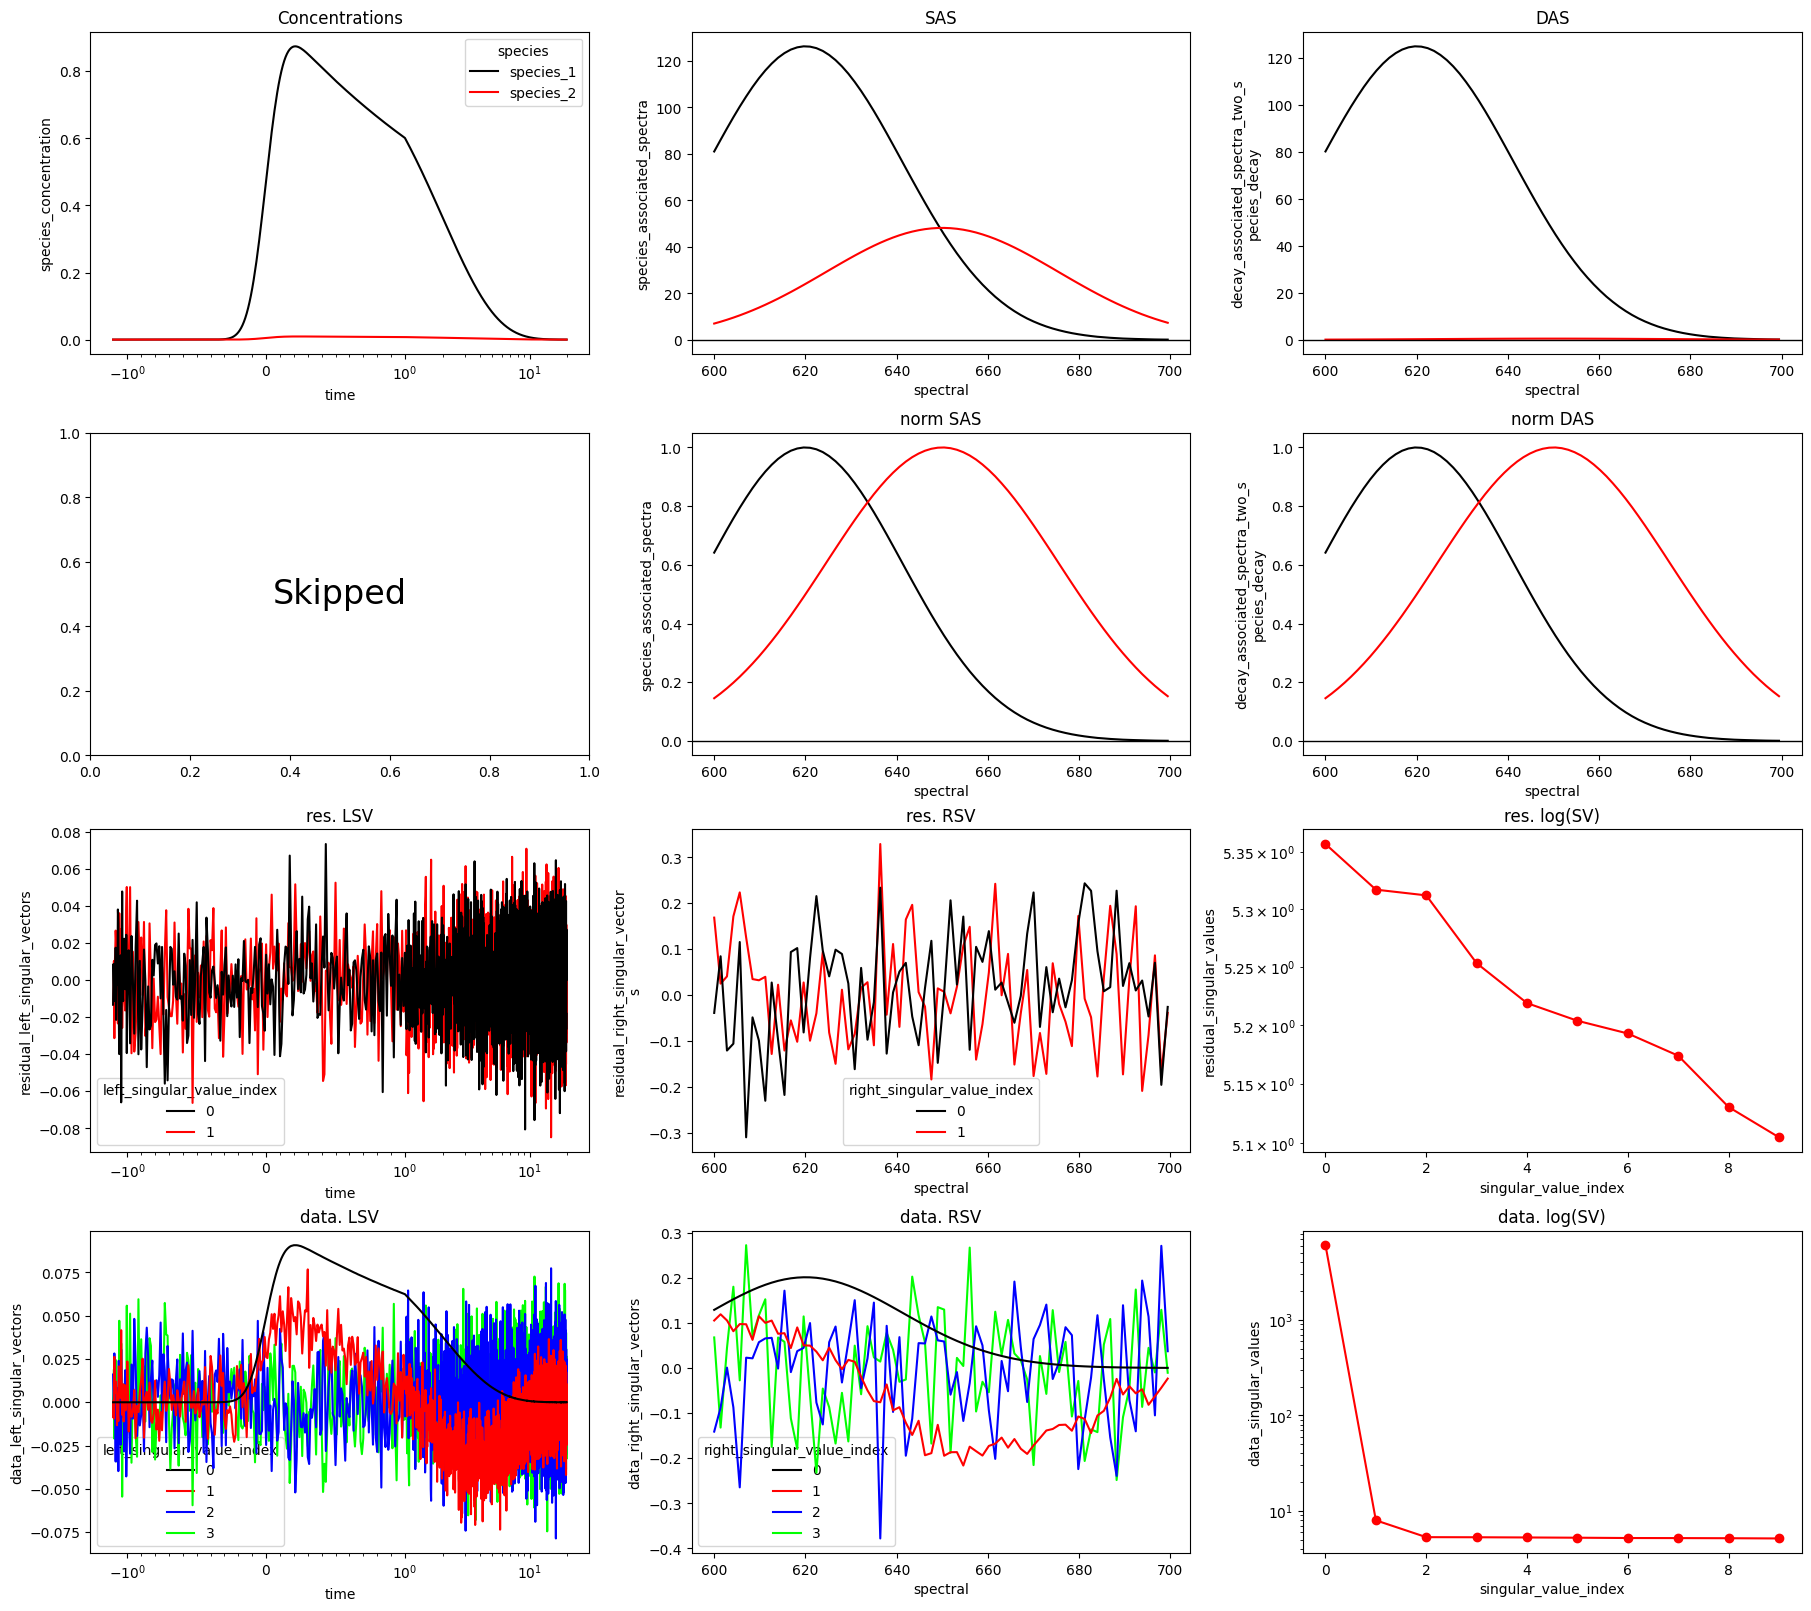

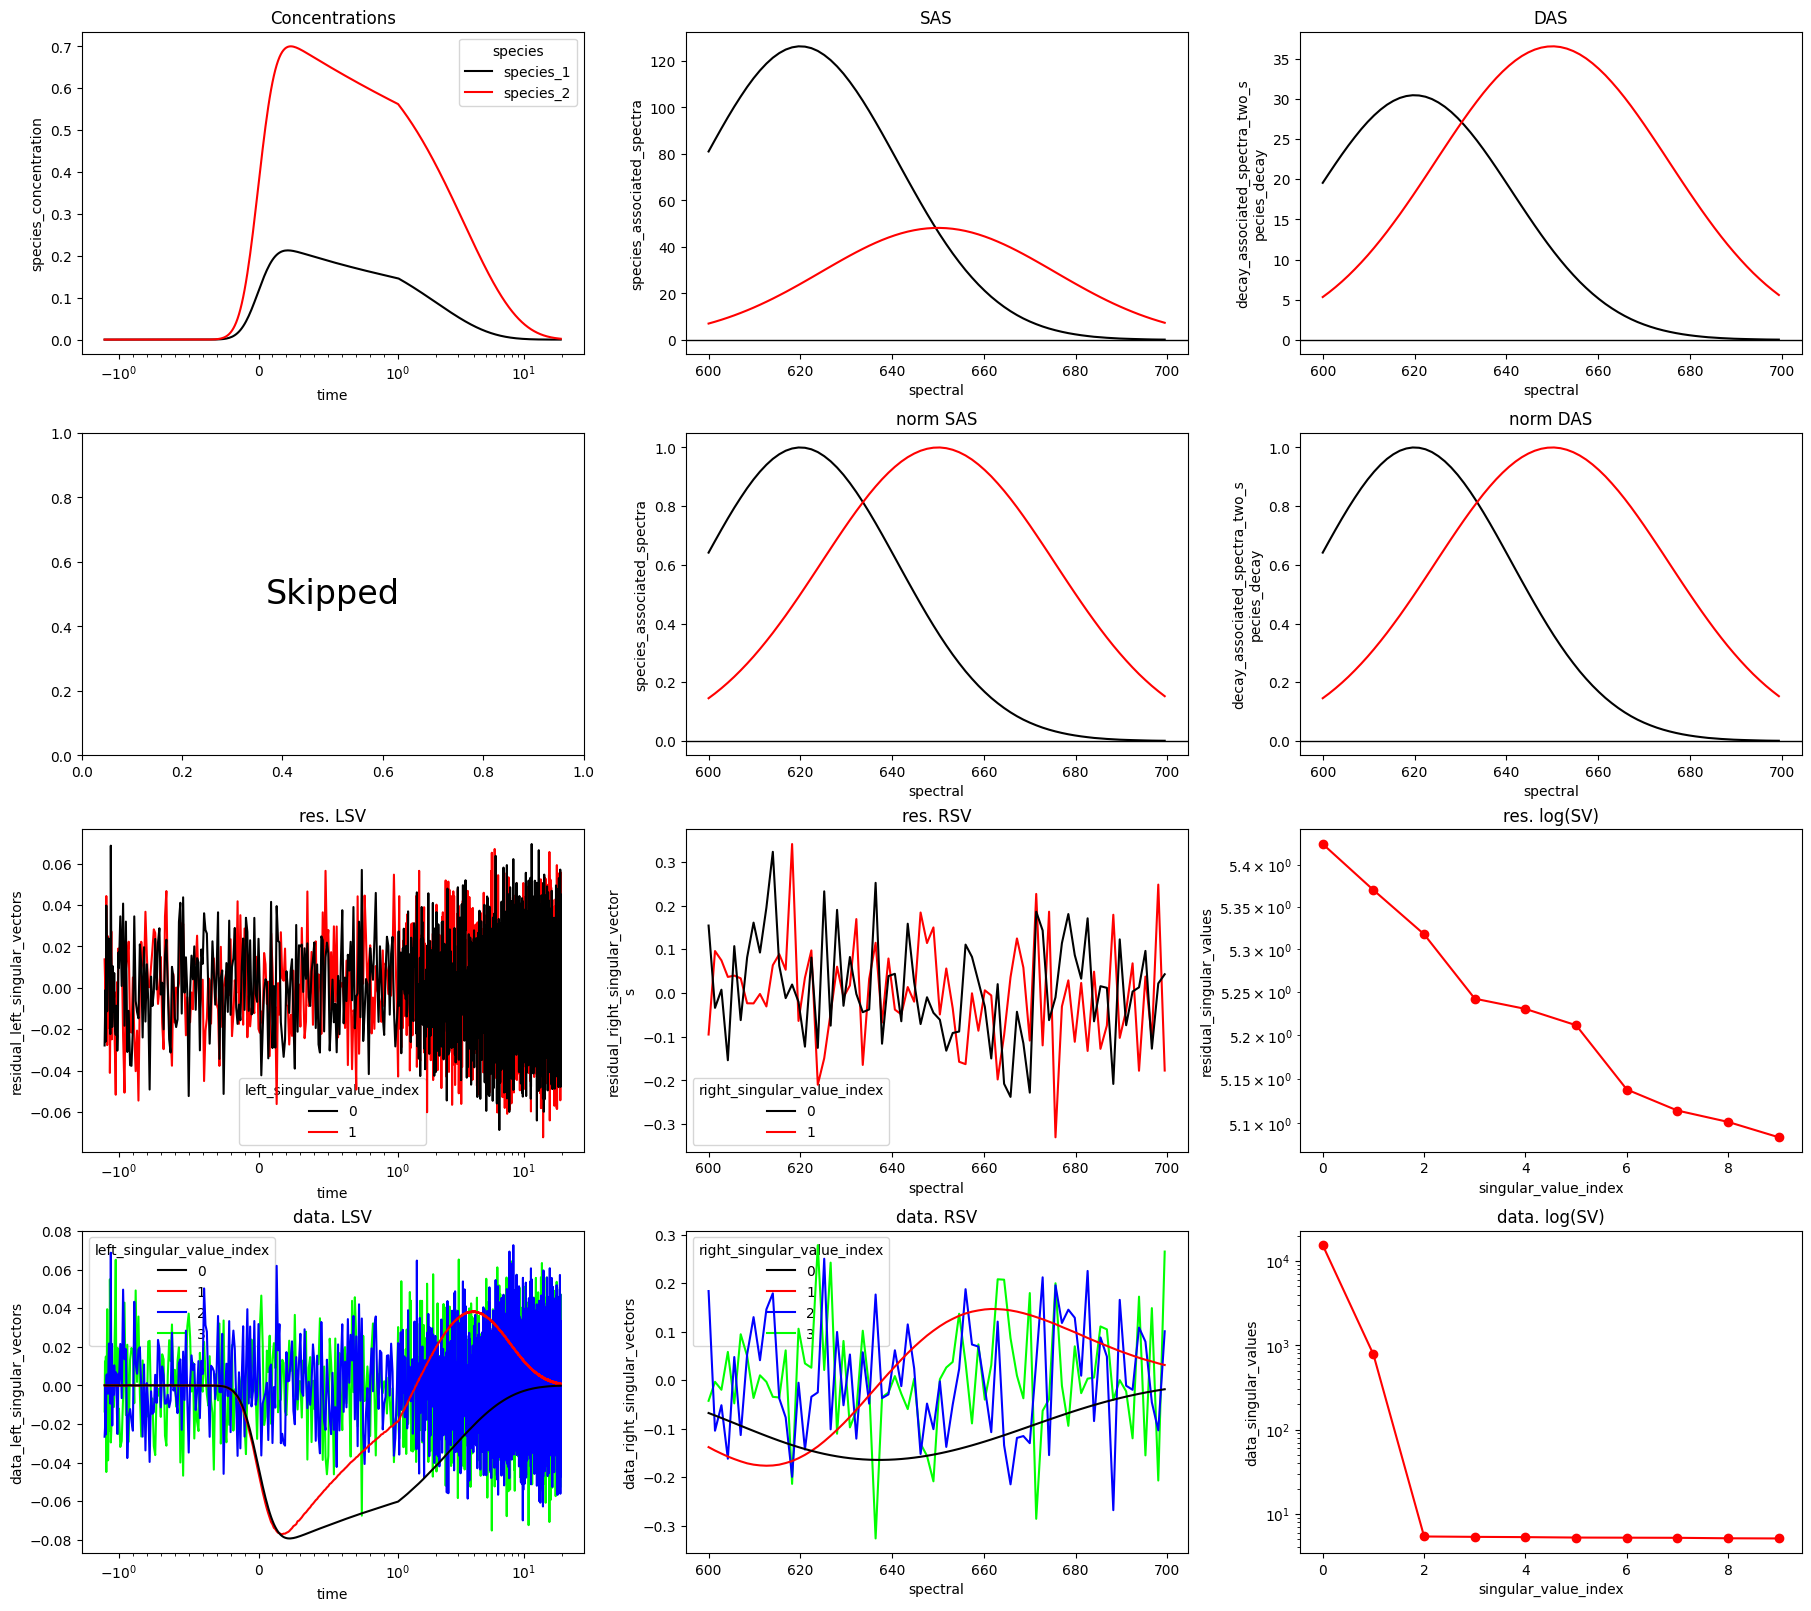

In [6]:
from pyglotaran_extras import plot_overview

plot_overview(result.data["dataset_1"], show_data=None)
plot_overview(result.data["dataset_2"], show_data=None);

## Fit with link_clp false

In [7]:
from glotaran.project import Scheme

scheme_link_clp_false = Scheme(
    model="models/fit-model_link_clp_false.yaml",
    parameters="models/fit-params.yaml",
    data={"dataset_1": ds1, "dataset_2": ds2},
)
scheme_link_clp_false.validate()

from glotaran.optimization.optimize import optimize

result_link_clp_false = optimize(scheme_link_clp_false)
result_link_clp_false

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.6179e+06                                    3.27e+07    
       1              2         3.2883e+05      2.29e+06       1.86e+00       1.26e+07    
       2              3         1.1739e+04      3.17e+05       3.71e+00       1.78e+06    
       3              6         1.5362e+03      1.02e+04       4.64e-01       1.61e+04    
       4             11         1.5290e+03      7.28e+00       3.63e-03       5.48e+02    
       5             12         1.5289e+03      2.81e-02       7.25e-03       4.26e+01    
       6             13         1.5289e+03      1.16e-04       1.45e-02       1.98e-01    
       7             14         1.5289e+03      1.15e-09       2.90e-02       1.64e-03    
       8             24         1.5289e+03      0.00e+00       0.00e+00       1.64e-03    
`xtol` termination condition is satisfied.
Function evaluations 24, initial cost 2.6179e+0

| Optimization Result                       |          |
|-------------------------------------------|----------|
| Number of residual evaluation             | 24       |
| Number of residuals                       | 302400   |
| Number of free parameters                 | 8        |
| Number of conditionally linear parameters | 288      |
| Degrees of freedom                        | 302104   |
| Chi Square                                | 3.06e+03 |
| Reduced Chi Square                        | 1.01e-02 |
| Root Mean Square Error (RMSE)             | 1.01e-01 |

| RMSE (per dataset)   |   weighted |   unweighted |
|----------------------|------------|--------------|
| 1.dataset_1:         |   1.01e-01 |     1.01e-01 |
| 2.dataset_2:         |   9.99e-02 |     9.99e-02 |

<br><details>

### Model

#### Dataset Groups

- **default**
  - _Label_: default
  - _Residual Function_: non_negative_least_squares
  - _Link Clp_: False


#### K Matrix

- **km2comp**
  - _Label_: km2comp
  - _Matrix_: {('species_1', 'species_1'): 'rates.species_1(4.98e-01±3.68e-05, t-value: 13555, initial: 5.50e-01)', ('species_2', 'species_2'): 'rates.species_2(3.00e-01±2.44e-05, t-value: 12265, initial: 1.00e-01)'}


#### Megacomplex

- **two_species_decay**
  - _Label_: two_species_decay
  - _Dimension_: time
  - _Type_: decay
  - _K Matrix_: ['km2comp']


#### Initial Concentration

- **input1**
  - _Label_: input1
  - _Compartments_: ['species_1', 'species_2']
  - _Parameters_: ['inputs.s1(2.54e-01±3.58e+01, t-value: 7.1e-03, initial: 1.00e+00)', 'inputs.s2_low(-2.03e-01±9.33e+01, t-value: -2.2e-03, initial: 1.00e-01)']
  - _Exclude From Normalize_: []

- **input2**
  - _Label_: input2
  - _Compartments_: ['species_1', 'species_2']
  - _Parameters_: ['inputs.s1(2.54e-01±3.58e+01, t-value: 7.1e-03, initial: 1.00e+00)', 'inputs.s2_normal(4.18e+00±1.68e+02, t-value: 2.5e-02, initial: 1.00e+00)']
  - _Exclude From Normalize_: []


#### Irf

- **gaussian_irf**
  - _Label_: gaussian_irf
  - _Normalize_: True
  - _Backsweep_: False
  - _Type_: gaussian
  - _Center_: irf.center(3.00e-01±4.47e-06, t-value: 67061, initial: 3.50e-01)
  - _Width_: irf.width(1.00e-01±6.08e-06, t-value: 16447, initial: 5.00e-02)


#### Dataset

- **dataset_1**
  - _Label_: dataset_1
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['two_species_decay']
  - _Initial Concentration_: input1
  - _Irf_: gaussian_irf

- **dataset_2**
  - _Label_: dataset_2
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['two_species_decay']
  - _Scale_: scale.dataset_2(3.03e+00±1.24e+02, t-value: 2.4e-02, initial: 1.00e+00)
  - _Initial Concentration_: input2
  - _Irf_: gaussian_irf



</section></section></details><section><section>

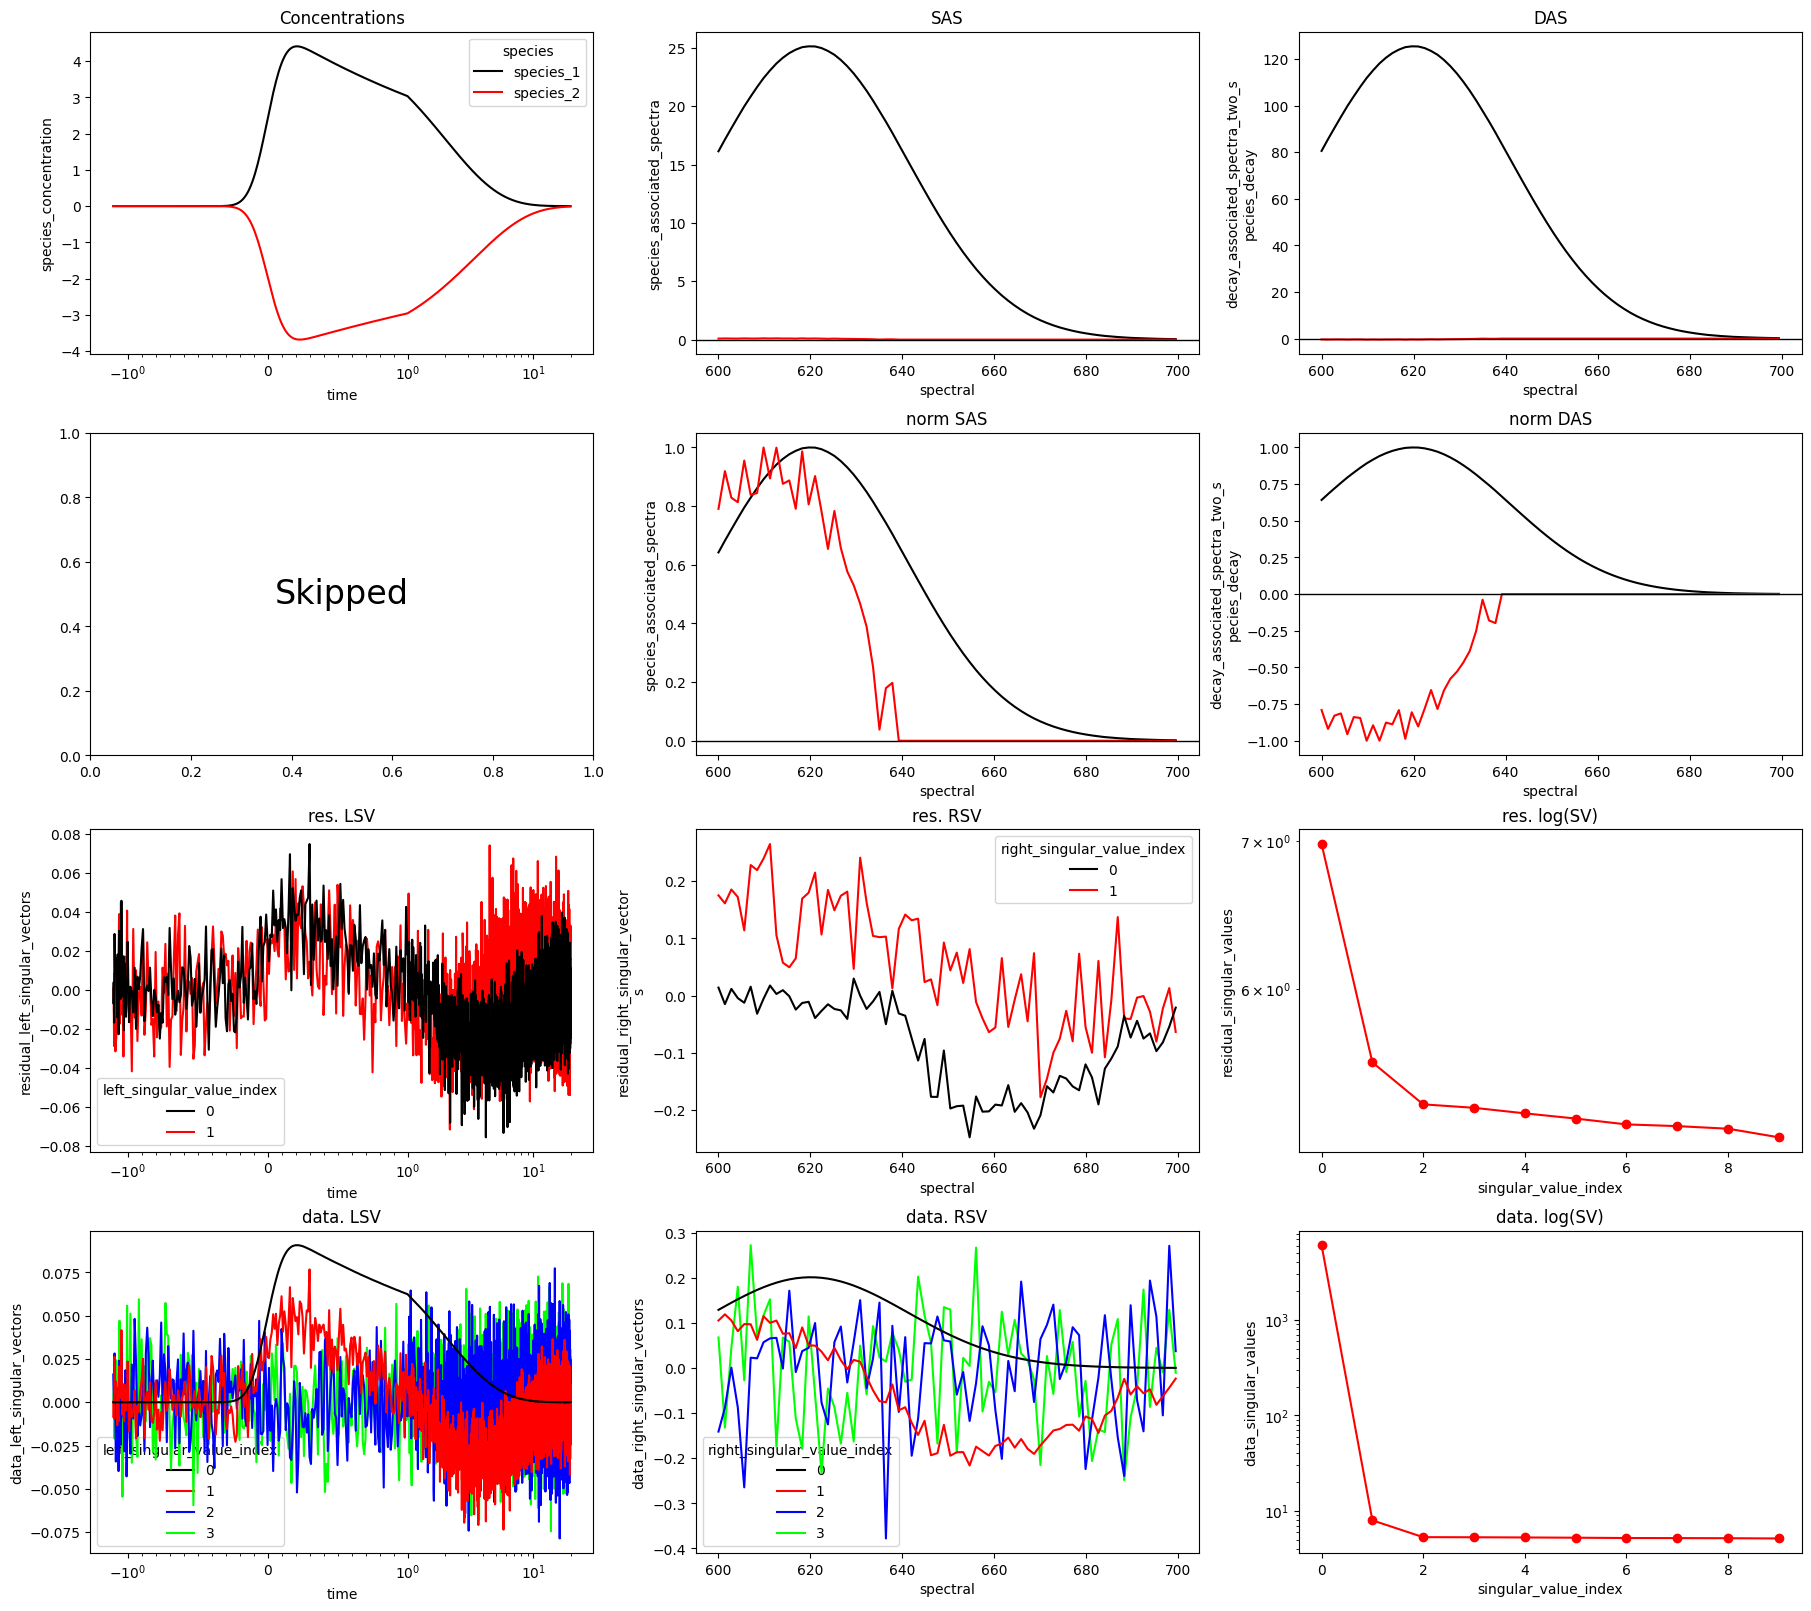

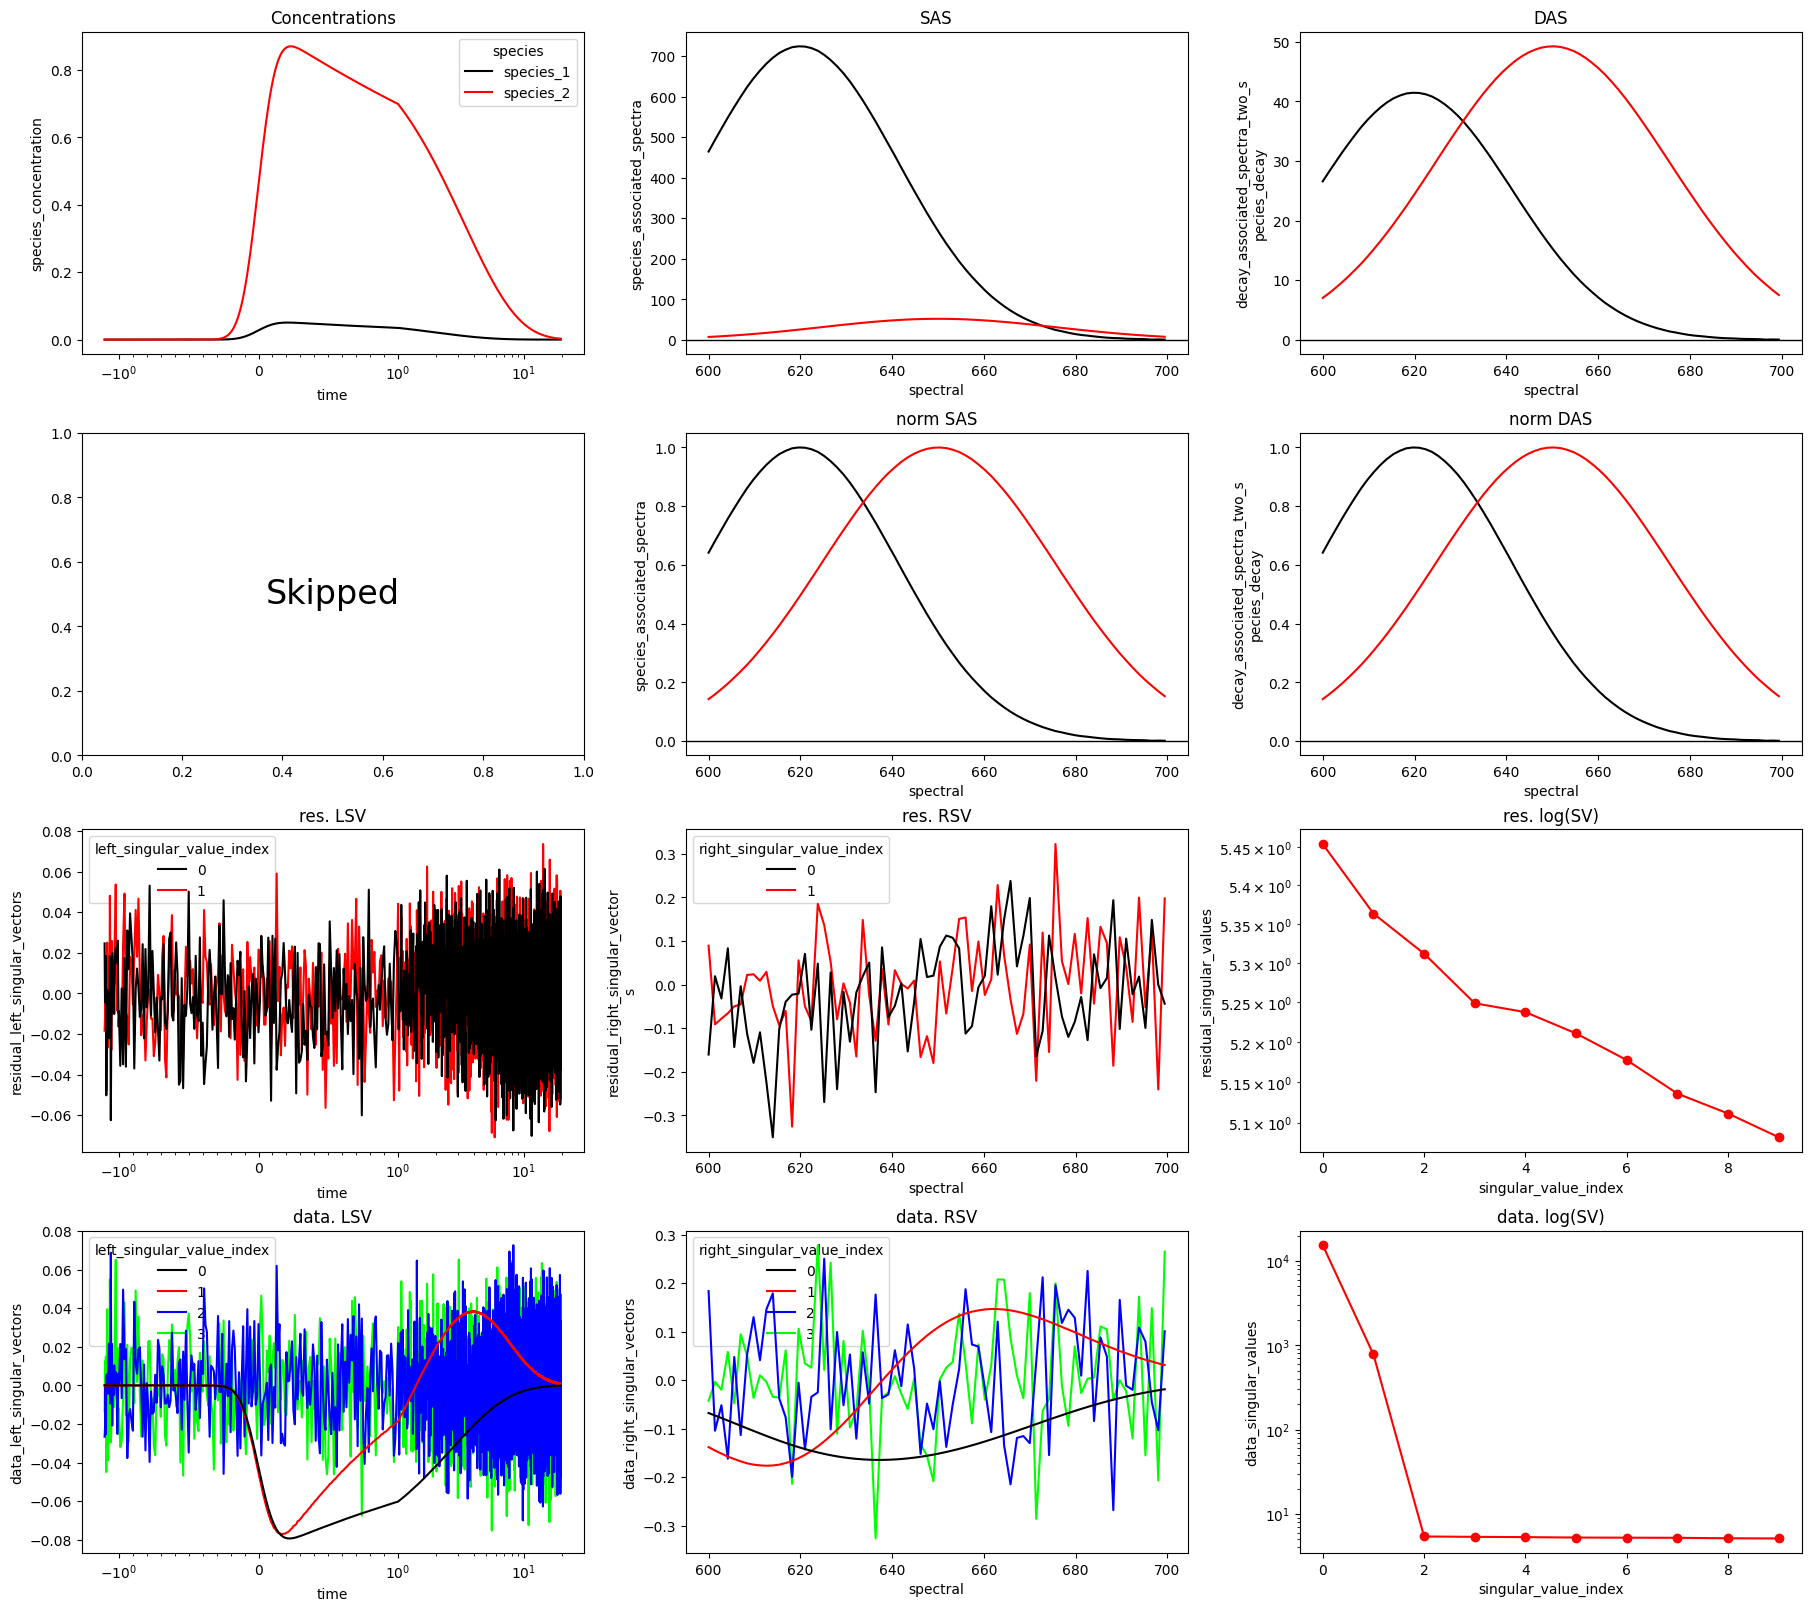

In [8]:
from pyglotaran_extras import plot_overview

plot_overview(result_link_clp_false.data["dataset_1"], show_data=None)
plot_overview(result_link_clp_false.data["dataset_2"], show_data=None);